# Facial Emotion Recognition

In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)
print(train)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [5]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)
print(test)
print(test['image'])

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
706

In [6]:
from tqdm.notebook import tqdm

In [7]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [8]:
train_features = extract_features(train['image'])
test_features = extract_features(test['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

  0%|          | 0/7066 [00:00<?, ?it/s]

In [9]:
x_train = train_features / 255.0
x_test = test_features / 255.0

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [16]:
# sequential model
model = Sequential()

# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# flattening
model.add(Flatten())

# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(7, activation='softmax'))

# model compilation
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [18]:
model.fit(x=x_train, y=y_train, batch_size=256, epochs=10, validation_data=(x_test, y_test))

In [19]:
pred = model.predict(x_test)      # prediction

In [60]:
predfinal = pred.argmax(axis=1)   # argmax takes higgest array from all 

In [57]:
model.save('emotiondetector.h5')   # saving model

In [43]:
# Saving the Model-It saves the trained model architecture and weights to files.
    
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [5]:
#Loading the Model and Making Predictions

from keras.models import model_from_json
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [6]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
def ef(image):
    img = load_img(image, grayscale=True)
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

In [7]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of sad
1/1 [==============================] - 1s 696ms/step
model prediction is  sad


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of happy
1/1 [==============================] - 0s 83ms/step
model prediction is  happy


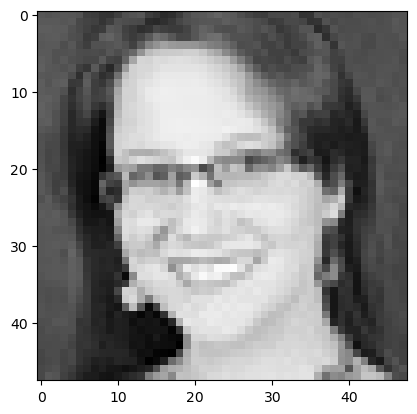

In [9]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 85ms/step
model prediction is  fear


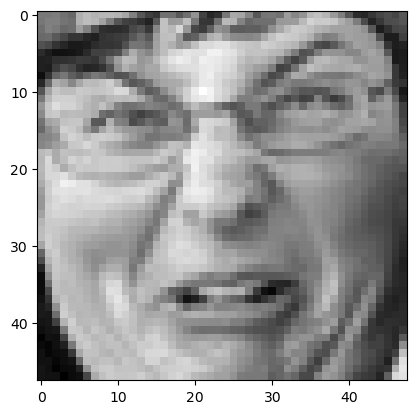

In [10]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of sad
1/1 [==============================] - 0s 71ms/step
model prediction is  sad


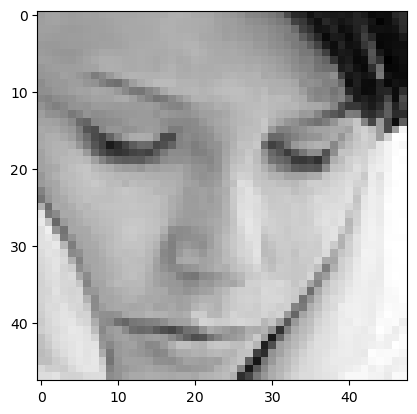

In [11]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')

## Making the model real time using OpenCV

In [20]:
import cv2
from keras.models import model_from_json
import numpy as np

# Loading pre-trained model
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)

# Loading pre-trained model weights
model.load_weights("emotiondetector.h5")

# Loading the Haarcascade classifier for face detection
haar_file = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)

# Function to extract features from an image
def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

webcam = cv2.VideoCapture(0)

# labels 
labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

while True:
    # Reading frame from webcam
    i, im = webcam.read()

    # Converting frame to grayscale
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    # Detecting faces in grayscale frame
    faces = face_cascade.detectMultiScale(im, 1.3, 5)

    try:
        # For each detected face, performing facial emotion recognition
        for (p, q, r, s) in faces:
            # Extracting the area of interest which contains the face
            image = gray[q:q + s, p:p + r]

            # Drawing rectangle around the detected face
            cv2.rectangle(im, (p, q), (p + r, q + s), (255, 0, 0), 2)

            # Resizing the face image to the required input size (48*48)
            image = cv2.resize(image, (48, 48))

            # Extracting features from the resized face image
            img = extract_features(image)

            # Making prediction using the trained model
            pred = model.predict(img)

            # Getting predicted label for emotion
            prediction_label = labels[pred.argmax()]

            # Displaying predicted emotion label near the detected face
            cv2.putText(im, f'Emotion: {prediction_label}', (p - 10, q - 10),
                        cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (0, 0, 255))

        # Displaying the frame real-time
        cv2.imshow("Real-time Facial Emotion Recognition", im)

        # Press 'Esc' key to break loop
        if cv2.waitKey(1) == 27:
            break

    except cv2.error:
        pass

webcam.release()
cv2.destroyAllWindows()